In [4]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [5]:
!python --version

Python 3.8.16


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
%matplotlib inline

In [27]:
dataframe = pd.read_csv('data_beras_kemendag.csv')
dataframe.head(20)

,tanggal,harga
0,2019-01-02,12000
1,2019-01-03,12000
2,2019-01-04,12000
3,2019-01-07,12000
4,2019-01-08,12000
5,2019-01-09,12000
6,2019-01-10,12000
7,2019-01-11,12000
8,2019-01-17,12000
9,2019-01-18,12000


In [29]:
dataframe['tanggal']=pd.to_datetime(dataframe['tanggal'])

In [30]:
dataframe.head()

,tanggal,harga
0,2019-01-02,12000
1,2019-01-03,12000
2,2019-01-04,12000
3,2019-01-07,12000
4,2019-01-08,12000


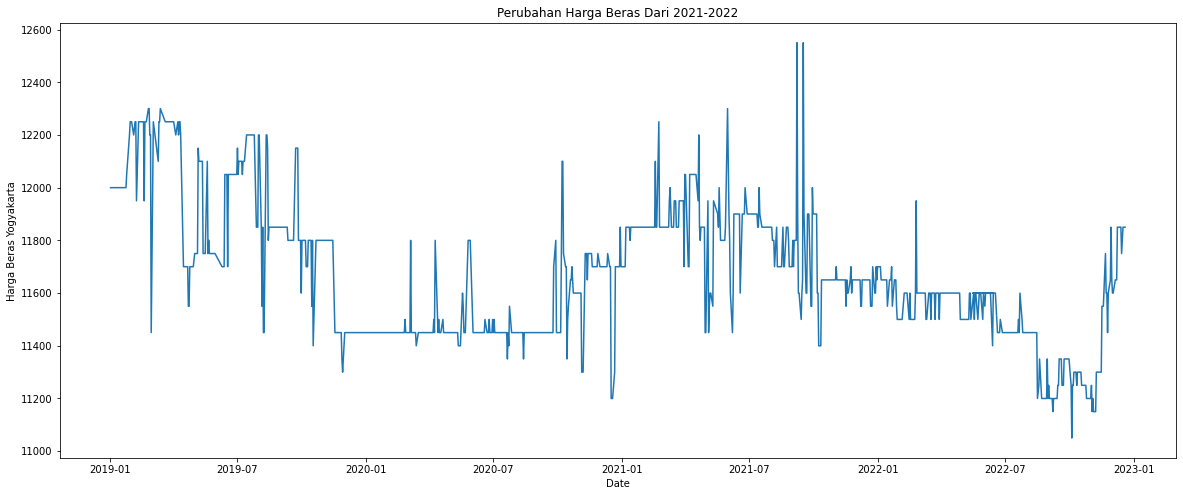

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(dataframe['tanggal'],
        dataframe['harga'])

ax.set(xlabel="Date",
       ylabel="Harga Beras Yogyakarta",
       title="Perubahan Harga Beras Dari 2021-2022")

plt.show()

In [32]:
dataframe = dataframe.rename(columns={'tanggal':'ds','harga':'y'})

In [33]:
model = Prophet()
model.fit(dataframe)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumgxm147/0uydhewp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumgxm147/p5fg97xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92306', 'data', 'file=/tmp/tmpumgxm147/0uydhewp.json', 'init=/tmp/tmpumgxm147/p5fg97xp.json', 'output', 'file=/tmp/tmpumgxm147/prophet_modelgns0wiol/prophet_model-20221224064106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future = model.make_future_dataframe(periods=30)
forecast= model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,12044.423250,11882.894647,12233.720790,12044.423250,12044.423250,15.415518,15.415518,15.415518,19.019697,19.019697,19.019697,-3.604179,-3.604179,-3.604179,0.0,0.0,0.0,12059.838768
1,2019-01-03,12043.110027,11876.780986,12226.661854,12043.110027,12043.110027,17.633209,17.633209,17.633209,16.977803,16.977803,16.977803,0.655406,0.655406,0.655406,0.0,0.0,0.0,12060.743236
2,2019-01-04,12041.796805,11876.119336,12210.679084,12041.796805,12041.796805,5.599100,5.599100,5.599100,0.282766,0.282766,0.282766,5.316334,5.316334,5.316334,0.0,0.0,0.0,12047.395905
3,2019-01-07,12037.857137,11884.341790,12243.165568,12037.857137,12037.857137,35.511435,35.511435,35.511435,14.318244,14.318244,14.318244,21.193191,21.193191,21.193191,0.0,0.0,0.0,12073.368572
4,2019-01-08,12036.543914,11891.848686,12236.107196,12036.543914,12036.543914,37.456148,37.456148,37.456148,10.540632,10.540632,10.540632,26.915516,26.915516,26.915516,0.0,0.0,0.0,12074.000062


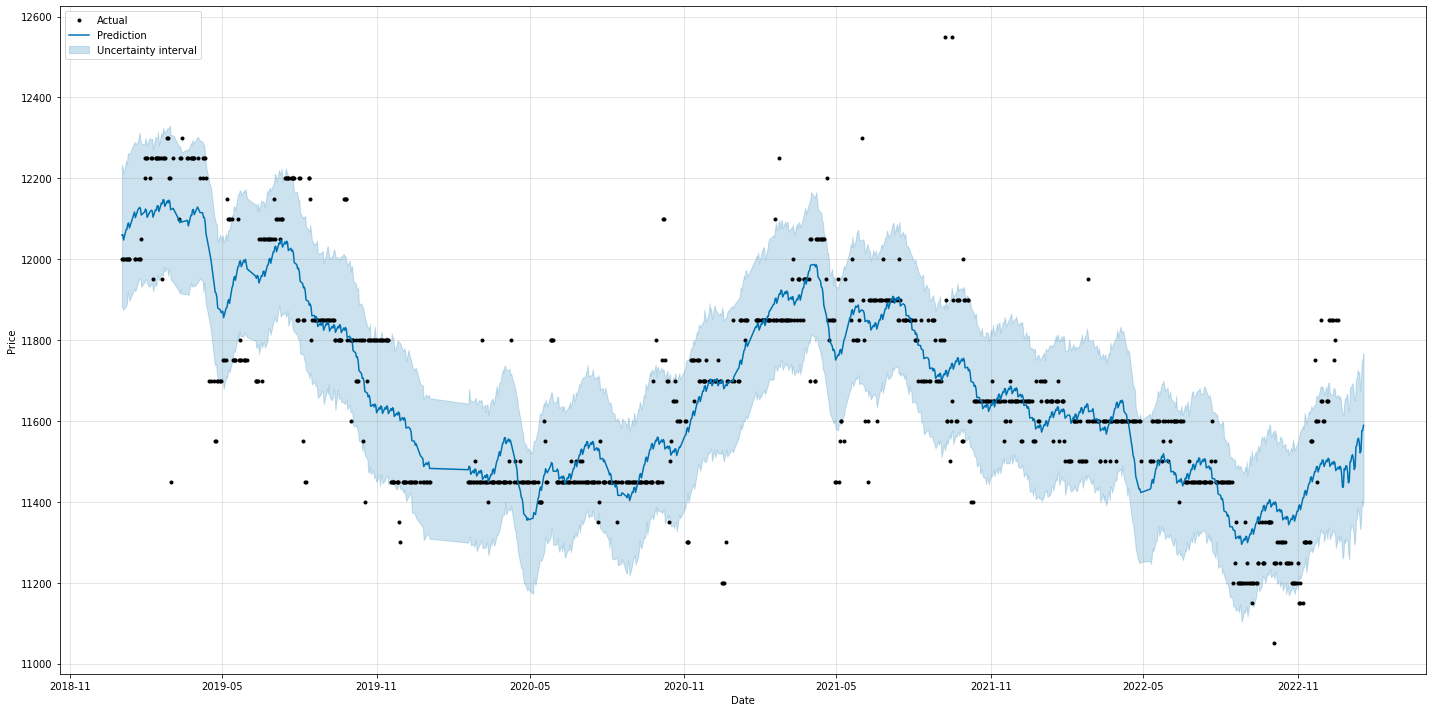

In [35]:
figure1= model.plot(forecast, xlabel='Date',ylabel='Price',figsize=(20,10))
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'], loc='upper left' )
plt.show()

1. Titik Hitam adalah data training
2. Garis biru prediksi dari fbprophet 
 


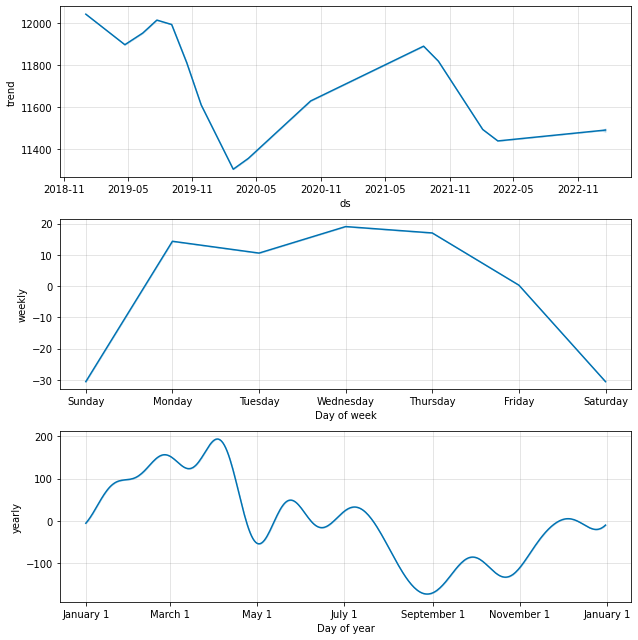

In [36]:
figure2= model.plot_components(forecast)

In [37]:
forecast2023 = forecast[(forecast['ds' ] >= '2023-01-01')]

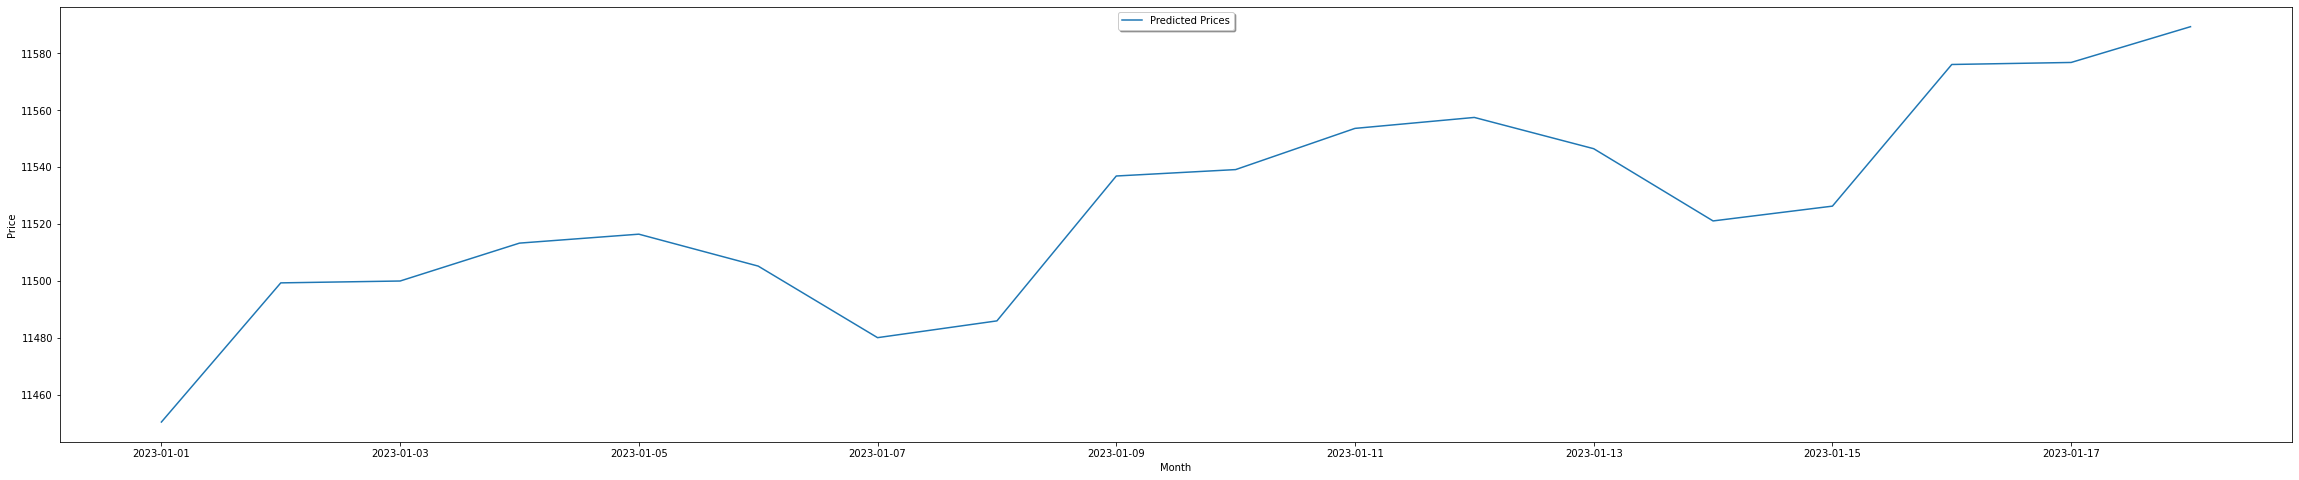

In [38]:
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(forecast2023['ds'], forecast2023['yhat'], label='Predicted Prices')
legend = ax.legend(loc='upper center', shadow=True)
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [23]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [24]:
plot_components_plotly(model, forecast)


In [25]:
# df = pd.read_csv('data_beras_kemendag2.csv')
# forecast['price'] = df['harga']
# pd.to_numeric(forecast['price'])
# # forecast['price'] = forecast['price'].fillna(0)
# forecast['label'] = np.where(forecast['price' ].isna(), 'Prediction', 'Actual')


# forecast.to_csv('data_beras_kemendag_prophet.csv', index=False)
# forecast.tail(50)
# # forecast['price'].dtypes